In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras import layers
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt

In [3]:
filepath_dict = {'yelp':   'data/yelp_labelled.txt',
                 'amazon': 'data/amazon_cells_labelled.txt',
                 'imdb':   'data/imdb_labelled.txt'}

In [4]:
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)
df = pd.concat(df_list)

In [6]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()



In [7]:
class keras:
    def __init__(self,source):
        self.source = source
        self.vectorizer = None
        self.model = None
    def graph(self):
        df_yelp = df[ df['source']==self.source]
        X = df_yelp['sentence'].values
        Y = df_yelp['label'].values
        sentences_train, sentences_test, y_train, y_test = train_test_split(
                X, Y, test_size=0.25, random_state=1000)
        vectorizer = CountVectorizer()
        vectorizer.fit(sentences_train)
        X_train = vectorizer.transform(sentences_train)
        X_test  = vectorizer.transform(sentences_test)
        input_dim = X_train.shape[1]  # Number of features

        model = Sequential()
        model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', 
                       optimizer='adam', 
                       metrics=['accuracy'])

        history = model.fit(X_train, y_train,
                         epochs=100,
                         verbose=False,
                         validation_data=(X_test, y_test),
                         batch_size=10)
        k.clear_session()
        loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
        print("Training Accuracy: {:.4f}".format(accuracy))
        loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
        print("Testing Accuracy:  {:.4f}".format(accuracy))
        plot_history(history)
        self.vectorizer = vectorizer
        self.model = model
    def predict(self,text):
        test = self.vectorizer.transform([text])
        if self.model.predict(test)[0]>0.5:
            return 'happy'
        else: return 'sad'

Training Accuracy: 1.0000
Testing Accuracy:  0.7880


'happy'

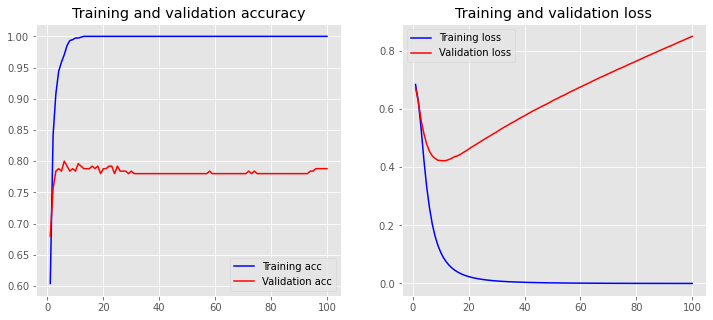

In [9]:
amazon = keras('amazon')
amazon.graph()
amazon.predict('We walked and happy')

Training Accuracy: 1.0000
Testing Accuracy:  0.7968


'sad'

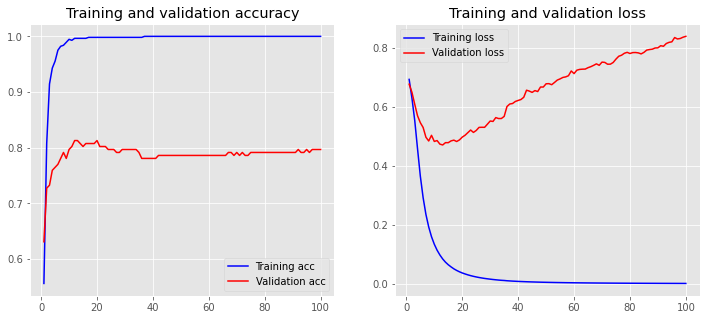

In [10]:
imdb = keras('imdb')
imdb.graph()
imdb.predict('We walked and happy')

In [5]:
class sklearn:
    def __init__(self,source):
        self.source = source
        self.vectorizer = None
        self.model = None
    def score(self):
        df_yelp = df[ df['source']==self.source]
        X = df_yelp['sentence'].values
        Y = df_yelp['label'].values
        sentences_train, sentences_test, y_train, y_test = train_test_split(
                X, Y, test_size=0.25, random_state=1000)
        vectorizer = CountVectorizer()
        vectorizer.fit(sentences_train)
        X_train = vectorizer.transform(sentences_train)
        X_test  = vectorizer.transform(sentences_test)
        classifier = LogisticRegression()
        classifier.fit(X_train, y_train)
        score = classifier.score(X_test, y_test)
        self.vectorizer = vectorizer
        self.model = classifier
        return("Accuracy:", score)
    def predict(self,text):
        test = self.vectorizer.transform([text])
        if self.model.predict(test)[0]>0.5:
            return 'happy'
        else: return 'sad'

In [12]:
amazon = sklearn('amazon')
print(amazon.score())
print(amazon.predict('We walked and happy'))

('Accuracy:', 0.796)
happy


In [8]:
yelp = sklearn('yelp')
print(yelp.score())
print(yelp.predict('We walked and happy'))

('Accuracy:', 0.796)
happy


In [9]:
imdb = sklearn('imdb')
print(imdb.score())
print(imdb.predict('We walked and happy'))

('Accuracy:', 0.7486631016042781)
happy
